In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file = "march_only_trips_2020 2.csv"
df = pd.read_csv(file)
df.head()

df['day'] = pd.DatetimeIndex(df['Trip Start Timestamp']).day
df.head()


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,day
0,00019f1f256bfa706cf8641b1aa611f624325010,2020-03-01 00:15:00,03/01/2020 12:30:00 AM,320.0,1.5,1.703184e+10,1.703159e+10,60.0,59.0,5.0,...,10.08,False,1,41.832937,-87.653583,POINT (-87.6535834197 41.8329371807),41.826833,-87.672926,POINT (-87.6729255394 41.8268330147),1
1,000753ac45c450e21abdf1a4c961176bcfaefda3,2020-03-01 00:15:00,03/01/2020 12:45:00 AM,1512.0,8.8,1.703181e+10,1.703106e+10,NaN,6.0,12.5,...,19.03,False,1,NaN,NaN,NaN,41.942692,-87.651771,POINT (-87.6517705068 41.9426918444),1
2,002ec2876ddbe0274826cdc660c2a270b99e4554,2020-03-01 00:15:00,03/01/2020 12:15:00 AM,188.0,0.6,1.703108e+10,1.703132e+10,8.0,32.0,2.5,...,8.58,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),1
3,9270c6ca6296127112be3219f702101d1d338aa4,2020-03-01 00:15:00,03/01/2020 12:45:00 AM,1774.0,6.9,1.703122e+10,1.703129e+10,22.0,29.0,25.0,...,25.00,True,3,41.920802,-87.694532,POINT (-87.6945323419 41.9208017043),41.862414,-87.732470,POINT (-87.7324696377 41.8624142737),1
4,004be16829b751eb031b6b4f05a33542980c1940,2020-03-01 00:15:00,03/01/2020 12:30:00 AM,672.0,2.0,1.703107e+10,1.703122e+10,7.0,22.0,17.5,...,20.58,False,1,41.921778,-87.651062,POINT (-87.6510618838 41.9217781876),41.921273,-87.685082,POINT (-87.6850821101 41.9212731053),1


In [2]:
fare_df = df[["day", "Fare", "Trip Total"]]
fare_df.head()

,day,Fare,Trip Total
0,1,5.0,10.08
1,1,12.5,19.03
2,1,2.5,8.58
3,1,25.0,25.00
4,1,17.5,20.58


In [10]:
daily_group = fare_df.groupby(["day"])

Tip = fare_df["Trip Total"] - fare_df["Fare"]
fare_df["Tip"] = Tip

daily_comparison_df = daily_group.mean()
daily_comparison_df


<ipython-input-10-ab339e2e063a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare_df["Tip"] = Tip


,Fare,Trip Total,Tip
day,,,
1,12.110821,16.199954,4.089133
2,12.517293,17.375513,4.858220
3,11.775387,16.394522,4.619134
4,11.911238,16.596555,4.685316
5,12.255241,17.019216,4.763975
6,11.521548,15.994642,4.473094
7,10.851496,14.528974,3.677477
8,11.935694,15.855781,3.920087
9,12.098510,16.677302,4.578792


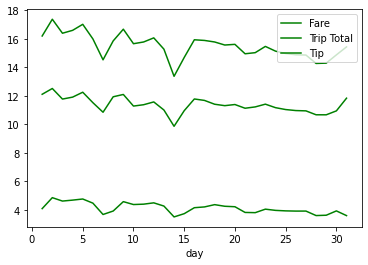

In [14]:


daily_comparison_df.plot(kind="line", color="green", label="total")

plt.show()

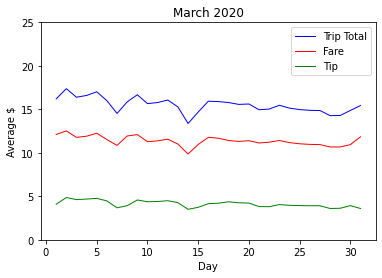

In [26]:
total, = plt.plot(daily_comparison_df["Trip Total"],color="blue", linewidth=1, label="Trip Total")
fare, = plt.plot(daily_comparison_df["Fare"],color="red", linewidth=1, label="Fare")
tip, = plt.plot(daily_comparison_df["Tip"],color="green", linewidth=1, label="Tip")

plt.legend(handles=[total,fare, tip], loc="best")


plt.title("March 2020")
plt.xlabel("Day")
plt.ylabel("Average $")
plt.ylim(0, 25)
plt.show()

7     371954
14    365633
6     353727
13    294185
5     290173
1     282627
8     270394
4     265137
12    258689
3     256751
9     254365
11    252835
2     250251
10    247466
15    200115
16    146828
17    103921
20     92530
18     91614
19     86224
21     70609
27     59866
28     54422
26     52068
23     51552
25     50529
22     49592
24     49357
30     47006
29     45139
31       370
Name: day, dtype: int64

In [29]:
pool_df = df[["day", "Trips Pooled" , "Shared Trip Authorized"]]
pool_df.head()

,day,Trips Pooled,Shared Trip Authorized
0,1,1,False
1,1,1,False
2,1,1,False
3,1,3,True
4,1,1,False


In [31]:
pool_data = pool_df["Shared Trip Authorized"].value_counts()
pool_data

False    4586805
True      679124
Name: Shared Trip Authorized, dtype: int64

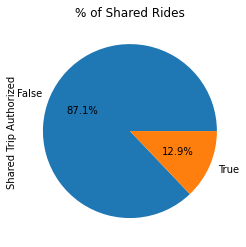

In [33]:
shared_pie = pool_data.plot(kind="pie", autopct="%1.1f%%", title=("% of Shared Rides"))
plt.show()

In [42]:
pool_df.head()

,day,Trips Pooled,Shared Trip Authorized
0,1,1,False
1,1,1,False
2,1,1,False
3,1,3,True
4,1,1,False


In [50]:
trips_pooled = df[["day", "Trips Pooled"]]
trips_pooled.head()

,day,Trips Pooled
0,1,1
1,1,1
2,1,1
3,1,3
4,1,1


In [53]:
pool_total = trips_pooled[trips_pooled['Trips Pooled']!=1]
pool_total.shape
pool_total.head()


,day,Trips Pooled
3,1,3
15,1,2
16,1,2
26,1,4
30,1,2


In [55]:
pool_group = pool_total.groupby(["day"])

pool_total_df = pool_group.sum()
pool_total_df

,Trips Pooled
day,
1,54971
2,58399
3,59999
4,60984
5,62988
6,78695
7,65373
8,57195
9,66631


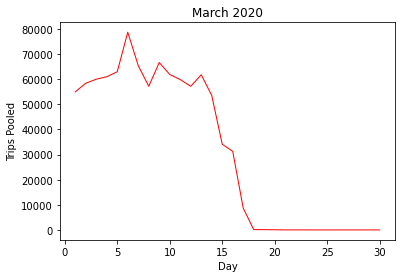

In [57]:
pooled, = plt.plot(pool_total_df["Trips Pooled"],color="red", linewidth=1, label="Trips Pooled")

plt.title("March 2020")
plt.xlabel("Day")
plt.ylabel("Trips Pooled")
plt.show()